### Import useful libraries and helpers

In [111]:
%run "Imports.ipynb"
%run "Helpers.ipynb"

### Load the data

In [2]:
df_all = pd.read_pickle("df_all.pkl")

### Have a look at each city zone separately

In [17]:
# [0,9] [1,9] [2,9] ... [7,9] [8,9] [9,9]
# .......................................
# [0,2] [1,2] [2,2] ... [7,2] [8,2] [9,2]
# [0,1] [1,1] [2,1] ... [7,1] [8,1] [9,1]
# [0,0] [1,0] [2,0] ... [7,0] [8,0] [9,0]

In [18]:
zone_names = df_all['zone'].unique()

In [19]:
# Create a data frame dictionary to store zone data frames
DataFrameDict = {elem : pd.DataFrame for elem in zone_names}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df_all[:][df_all.zone == key]

In [21]:
DataFrameDict['0_0_10_10'].head()

,Unnamed: 0,zone,timestamp,supply,forecast,date,time,new_year,new_year_week,epiphany,...,new_years_eve,other,temperature_max,temperature_min,rain,sat_or_sun,holidays,holidays_week,x_coordinate,y_coordinate
0,0,0_0_10_10,2019-01-04 14:00:00,1,NaN,2019-01-04,14:00:00,0,0.5,0,...,0,0,0.0,-6.666667,0.508,0,0,0.5,0,0
1,1,0_0_10_10,2019-01-04 15:00:00,0,NaN,2019-01-04,15:00:00,0,0.5,0,...,0,0,0.0,-6.666667,0.508,0,0,0.5,0,0
2,2,0_0_10_10,2019-01-04 16:00:00,0,NaN,2019-01-04,16:00:00,0,0.5,0,...,0,0,0.0,-6.666667,0.508,0,0,0.5,0,0
3,3,0_0_10_10,2019-01-04 17:00:00,0,NaN,2019-01-04,17:00:00,0,0.5,0,...,0,0,0.0,-6.666667,0.508,0,0,0.5,0,0
4,4,0_0_10_10,2019-01-04 18:00:00,0,NaN,2019-01-04,18:00:00,0,0.5,0,...,0,0,0.0,-6.666667,0.508,0,0,0.5,0,0


### Naive prediction

In [78]:
naive_forecast = calculate_naive_forecast(DataFrameDict, '2019-12-31 00:00:00')

In [87]:
naive_xyz = prepare_xyz(naive_forecast)

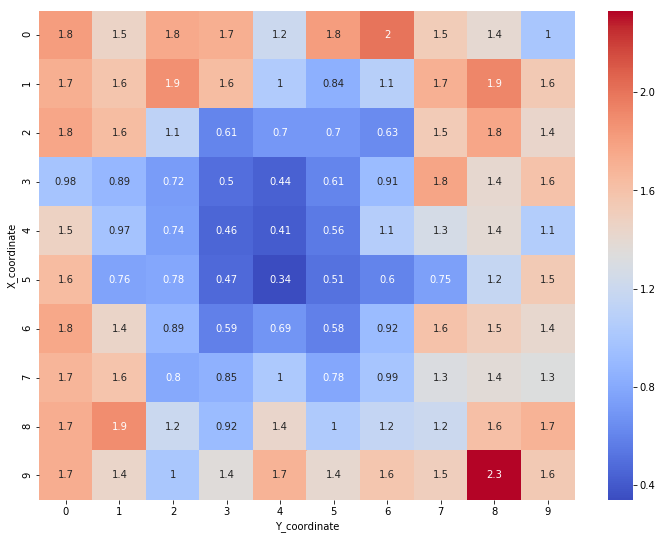

In [88]:
plot_heatmap(*naive_xyz)

### Prophet prediction

In [77]:
prophet_forecast = calculate_prophet_forecast(DataFrameDict, '2019-12-31 00:00:00')

In [89]:
prophet_xyz = prepare_xyz(prophet_forecast)

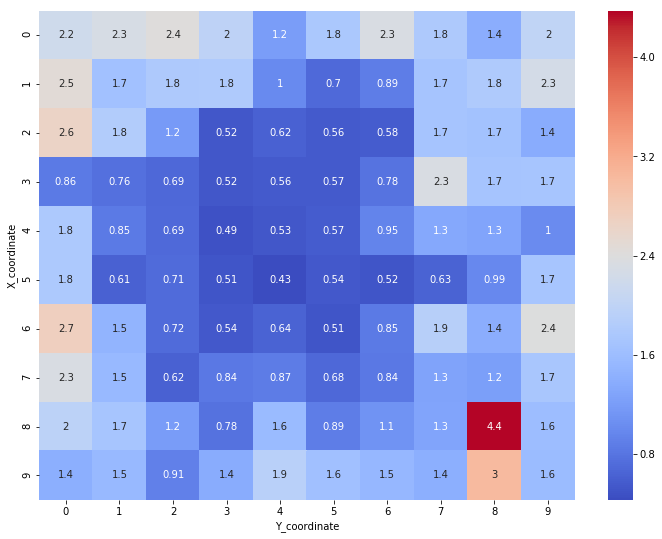

In [91]:
plot_heatmap(*prophet_xyz)

#### Prophet analysis of single zone

### Compare Prophet and naive prediction results

In [100]:
z_naive = naive_xyz[2]

In [101]:
z_prophet = prophet_xyz[2]

In [104]:
diff = z_naive - z_prophet

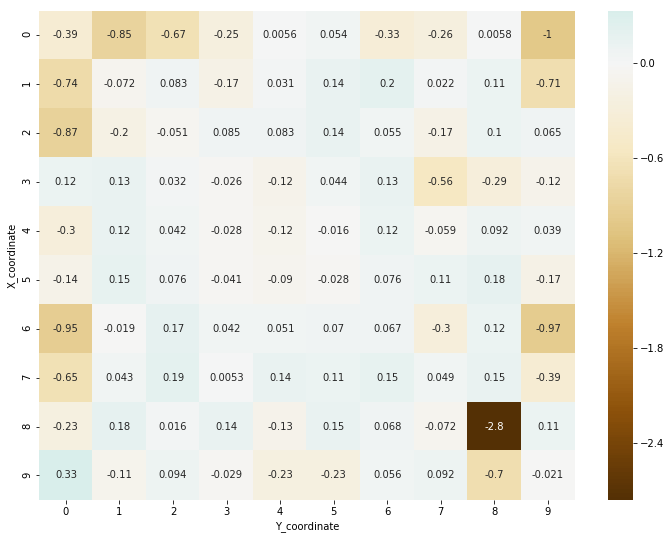

In [114]:
plot_heatmap(naive_xyz[0],naive_xyz[1],diff,center=0.00,cmap="BrBG")

In [108]:
diff.sum()

-11.396743166399997